# Gaussian Processes (GPs)

### Imoprts

In [1]:
import sys
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set_style('darkgrid')

 ### Gaussian processes 

$$ f(x) \sim \mathcal{GP}(m(x),k(x_1,x_2)) \\
f(X) \sim \mathcal{N}(m(X), K(X, X)) $$

### RBF Kernal
$$
K(x_a, x_b) = \exp{ \left( -\frac{1}{2\sigma^2} \lVert x_a - x_b \rVert^2 \right)}
$$

In [2]:
def rbf(xa, xb, l=1, sigma=1):
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean') / (l*l)
    return np.exp(sq_norm) * sigma * sigma

In [3]:
num_samples = 41
num_functions = 5

X = np.expand_dims(np.linspace(-5, 5, num_samples), 1)
Σ = rbf(X, X)

Ys = np.random.multivariate_normal(mean=np.zeros(num_samples), cov=Σ, size=num_functions)
Ys.shape

(5, 41)

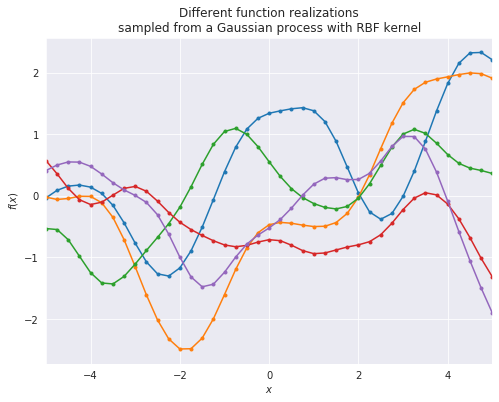

In [4]:
plt.figure(figsize=(8, 6))
for i in range(num_functions):
    plt.plot(X, Ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title(('Different function realizations\nsampled from a Gaussian process with RBF kernel'))
plt.xlim([-5, 5])
plt.show()

In [5]:
def GP(X1, y1, X2, kernel_func):
    Σ11 = kernel_func(X1, X1)
    Σ12 = kernel_func(X1, X2)
    solved = scipy.linalg.solve(Σ11, Σ12, assume_a='pos').T
    μ2 = solved @ y1
    Σ22 = kernel_func(X2, X2)
    Σ2 = Σ22 - (solved @ Σ12)
    return μ2, Σ2

In [7]:
# Define the true function that we want to regress on
f_sin = lambda x: (np.sin(x)).flatten()

n1 = 8
n2 = 75
ny = 5
domain = (-6, 6)

X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1,1))
y1 = f_sin(X1)

X2 = np.linspace(domain[0], domain[1], n2).reshape(-1,1)

μ2, Σ2 = GP(X1, y1, X2, rbf)

σ2 = np.sqrt(np.diag(Σ2))

y2 = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=ny)
y2.shape

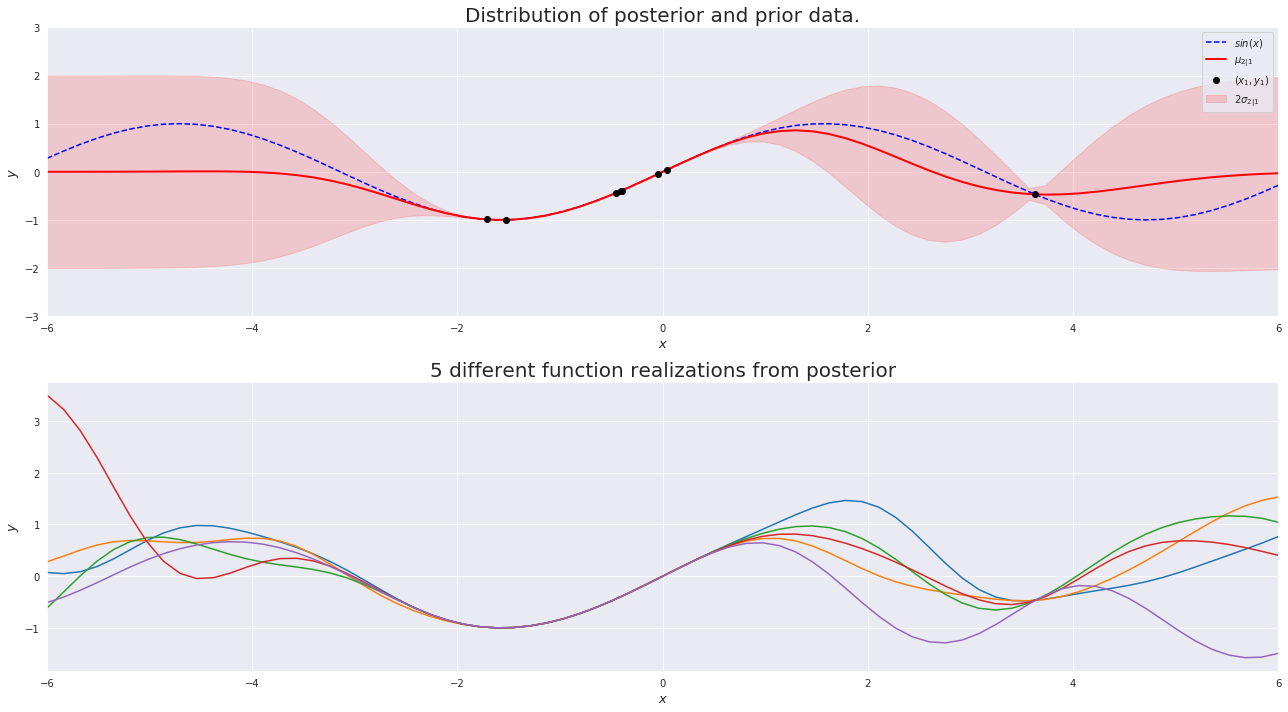

In [11]:

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))

ax1.plot(X2, f_sin(X2), 'b--', label='$sin(x)$')
ax1.fill_between(X2.flat, μ2-2*σ2, μ2+2*σ2, color='red', alpha=0.15, label='$2 \sigma_{2|1}$')
ax1.plot(X2, μ2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.', fontsize=20)
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend()
# Plot some samples from this function
ax2.plot(X2, y2.T, '-')
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('5 different function realizations from posterior', fontsize=20)
ax1.axis([domain[0], domain[1], -3, 3])
ax2.set_xlim([-6, 6])
plt.tight_layout()
plt.show()